### Введение

Привет, Habr! На связи отдел аналитики данных X5 Tech.

Сегодня мы наблюдаем большой рост интереса аналитиков к ценообразованию.
Данный интересен подкрепляется бурным развитием RL и его большими расчётными эффектами.
В данной статье мы поговорим про некоторые аспекты ценообразования в офлайн ритейле.


В данной статье я хочу провести краткий экскурс в области аналитики ценообразования оффлайн ритейла, а именно,
каким образом многие популярные ритейлеры выбирают итоговую цену, которую читатель видит на полке.
Мы с коллегами планируем серию статей, которые будут освещать ту или иную область ценовой аналитики и всего, что лежит вокруг нее.
Текст ниже нужен для того, чтобы погрузить людей в новую для себя область, обрисовать задачу, проблемы и возможные (далеко не все!) методы их решения.
Так же, хочу акцентировать внимание на том, что речь идет именно об офлайне.
Это важный момент, потому что стратегия ценообразования онлайна значительно отличается от офлайна, хотя многие моменты у них, несомненно, общие.

### Постановка задачи
Основная задача ценообразования — предложить цену на товары в соответствии с целями и ограничениями бизнеса.
В современном ритейле существует ряд подходов по расчету полочной цены:

1) Статичная стратегия, заключающаяся в фиксации цены без анализа внешних факторов, истории и рынка. 
Например, самый простой подход заключается в том, что на различные категории товаров в различных магазинах выставляет фиксированная наценка. 
Изменилась закупочная цена – мгновенно изменяется и полочная. 
Плюс в том, что наценкой бизнес управляет по построению. 
Минус – в том, что по большинству позиций магазин будет не в рынке, либо дешевле (упуская часть выручки), либо дороже (упуская часть трафика).


2) Ценообразование по правилам. В частности, подстройка под конкурентов.
Механизм, который удобен тем, что не нужно ломать голову над адекватностью результата, т.к. «стоишь в рынок».
Плюсы на этом и заканчиваются, потому что такой подход требует:
* Хорошее качество мониторингов цен конкурентов. Любой косяк во входящих данных чреват неконтролируемыми последствиями.
* Обработку мониторингов.
Те, кто хотя бы раз занимался матчингом чужого ассортимента со своим, не дадут соврать – задача само по себе далеко не тривиальная. 
Обычно этим занимаются “кожаные нейросети” (т.е. низкооплачиваемый ручной труд). 
Сюда же можно отнести анализ на выбросы, на неверные флаги промо и прочие чистки.
* Четкое понимание у бизнеса, какие позиции как должны быть соотнесены с ключевыми конкурентами. 
Звучит неплохо, но далеко не каждый категорийный менеджер сходу сможет сказать, что он хочет, помимо мгновенного богатства и власти.
* Реализацию какой-то логики для товаров, у которых значений цен конкурентов нет. 
Может быть надо делать жесткую привязку к тем, у кого есть? 
Или задирать цену в космос? 
Или избавляться от ассортимента, которого нет у конкурентов? 
Или наоборот налегать на него, как на дарящий конкурентное преимущество? 
Очень много вариантов, при этом никакой математики тут обычно нет, максимум какие-то пропорции из шестого класса школы.


3) Оптимизация. Термин слегка размытый, но мы под ним подразумеваем ту самую задачу оптимизации, которую многие изучали в институте. 
Есть максимизируемый функционал, есть краевые условия – ищем цены. Звучит неплохо, но требует:
* Адекватную модель спроса, зависящую только от вектора цен. 
Уже на этом этапе зачастую происходит затык, потому что одна модель может хорошо работать для товара А и вообще не работать для товара Б. 
Соответственно, нужно либо жертвовать точностью ради унитарности и доступности оптимизатору, либо сильно усложнять внутреннюю логику алгоритмов. 
Даже в простейшем виде есть три параллельные модели эластичности спроса, и нужно выбрать ту, которая больше подходит:
    - log log
    - log lin
    - lin lin
* Нахождение ценовой эластичности. Вытекает из пункта a, то что мы выбрали модель еще не значит, что у нас есть все коэффициенты. На моей практике, если идти по учебнику, оставляя только ряды с достаточным количеством точек, небольшой дисперсией (после всех доступных обработок) и итд, то в офлайне останется не более 10% актуальных пар товар-магазин. Для онлайна цифра еще ниже. Причем останутся именно те товары, с которыми и так всё понятно, т.к. они давно на полках. А что делать с остальными?
* Формулирование постановки задачи. Хорошо, мы определились с целевым максимизируемым функционалом, и бизнес сказал, например, «хочу выручки больше». Начинаются сессии «а при каких условиях», потому что внезапно выясняется, что помимо выручки бывают еще и другие важные показатели (типа штучного ТО, маржинальности, трафика), и их бы тоже не потерять. А еще есть ограничения от ФАС. А еще в минус торговать не хочется. А еще конкурентов бы тоже учитывать. Итд Итп. 
* Сюда еще можно добавить, что далеко на очевидно, в каких разрезах мы решаем задачу. Нужно ли добавлять даты? Хотим ли мы считать на уровне магазина или сразу на уровне кластера? Если да, то что считаем кластером? Какой возможен ли разброс цен на одну и туже позицию в рамках одного города?
* Выбор оптимизатора. Есть коробочные решения, есть опенсорс. У каждого свои плюсы и минусы.  В нюансы использования каждого нужно погружаться, тратить много времени. Например, я однажды реализовывал оптимизацию ЦО на движке SAS, который довольно неплох, но для его использования нужно выучить еще один диалект и так не очень популярного языка.


4) Как будем проверять нововведения?
* Никак. Смешно, но частый вариант, когда подход внедряется “волевым усилием”, и в конце фин.периода просто подводят черту всем проведенным активностям, сравнивая с каким-то дефолтным сценарием. Как ни странно, но в ритейле, особенно в русском, это далеко не редкий путь.
* A/B/n тесты. Взрослый вариант с проведением пилота. Требует корректного разбиения на А и В группы (что мы считаем “корректным” оставляем за скобками) и четкого понимания, какие метрики мы отслеживаем, какой эффект ожидаем. 
Из явных недостатков: пилот может длиться несколько месяцев, и за это время группы А и Б могут перестать быть сопоставимыми. Например за время проведения пилота в регионе появился новый крупный конкурент. Нужно заранее определить ключевые метрики и показатели, которые мы будем контролировать в теч. пилота, чтобы с чистой совестью сказать, что результаты пилота зависели именно от оптимизации цен.
* Многорукие бандиты. Еще один вариант пилота. За управление отвечает алгоритм из семейства, суть которых сводится к тому что мы, уже находясь в пилоте, можем управлять тем кто у нас в группе А, кто в В, а кто еще где-то. Также некоторые разновидности позволяют корректировать “на лету” управляющие параметры по мере получения данных. Выделяют несколько видов бандитских алгоритмов (эпсилон-жадный, через верхний доверительный предел, метод выборки Томпсона), перед их внедрением желательно ознакомиться с каждым. 
В любом случае, главным плюсом такого подхода является его динамичность. Если наш новенький оптимизатор хорошо себя показывает в первые недели — мы не ждем, пока пройдут все 2-3 месяца пилота, а постепенно наращиваем тестовую группу. Так же, мы можем даже не зная истинную эластичность асимптотически к ней прийти (напр. при методе выборки Томпсона). 
Слабым моментом тут будет, конечно, то, что для офлайна скорость реакции на цену измеряется днями и неделями. Т.е. сделать вывод, о том, что “покупатели отреагировали на новую цену таким-то образом” можно далеко не сразу просто потому, что если про изменение цены никто не знает, то и реакции на него никакой не будет. В идеале, цена должна продержаться не менее чем один период потребления товара.
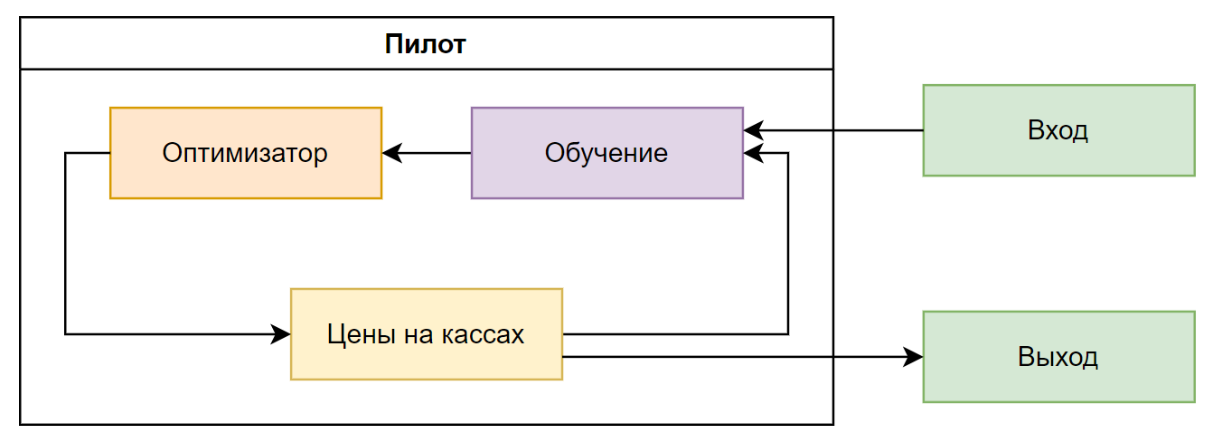

5) Ценовые тесты. Со звездочкой. Что делать, если за всю историю продукта цена на него менялась один-два раза? как посчитать эластичность? Один из вариантов решения - а давайте поменяем на него цену чуть-чуть и посмотрим, как изменится спрос. Такой подход называется ценовым тестированием. Логика поведения близка к бандитам из предыдущего пункта, но цель слегка другая. Ценовые тесты особенно популярны в онлайне, потому что там их можно делать дешево и быстро. Для офлайна, к сожалению, практика хоть и применяется, но, обычно, затрагивает небольшую долю товаров, которые не зажаты ограничениями в одну точку. Плюс, не забываем про много раз упомянутое ограничение на количество переоценок в единицу времени.

6) Вопрос устойчивости решения. Со звездочкой. Рынок ритейла крайне динамичен, решение, оптимальное с точки зрения модели на сегодня, может быть вообще не релевантным спустя месяц. А мы, все-таки, решаем математическую задачку и хотим быть уверенными, что она перекликается с реальностью. В идеале, стоит происследовать на предмет устойчивости, во-первых, коэффициенты модели (эластичность, сезонность), и, во-вторых – сам итоговый вектор цен.

Для исследования устойчивости коэф-тов можно провести, например, сэмплирование из обучающей выборки и проверить, что на полученной подвыборке (или подвыборках) значения будут лежать в окрестности друг от друга. Это в теории. На практике, качественных данных и так крайне мало. Убираешь промо, дефициты, праздники, периоды ввода и вывода – получишь в лучшем случае треть от исходного количества точек. Если еще и сэмплировать их начать – совсем грустно становится. 

Более жизнеспособный вариант – отслеживание значений в динамике. Прошел месяц, накопилась новая порция данных – пересчитали, сравнили с предыдущим. Если циферки сошлись – радуемся и идем дальше. А если не сошлись? Нужно идти в исследование «а что случилось». Но, в любом случае, если таких кейсов много, это говорит о полнейшей несостоятельности модели. Тревожный звоночек для аналитика: твоя модель спроса работает только на сферически-идеальных данных из прошлого, не используй её.

Устойчивость полученного решения – тоже отдельная подзадача. Сводится она к тому, что надо проанализировать, что будет, если мы чуть-чуть поменяем граничные условия или настроечные коэффициенты. Тут уже, как основной вывод, получим то, насколько хорошо мы управляем процессом оптимизации. Если небольшие входящие колебания вызывают серьезные изменения в итоговом векторе цен, значит есть повод задуматься, а было ли исходное решение действительно оптимальным, сходилось ли оно, хорошо ли выбраны пороги, нет ли каких-то внутренних вырождений. Технически, проверку можно осуществлять через Монте-Карло, внося шум много раз. Но этот процесс занимает значительно время, увлекаться им при каждом расчете не получится. Т.е. анализ проводится скорее по запросу, чем на регулярной основе.


### Бизнес ограничения


Даже если бизнес безгранично доверяет математике и аналитикам, ни один нормальный коммерсант не даст менять цены как угодно.
Основные ограничения, который вы встретите в ритейле это:
* Минимум/Максимум по наценке (в минус не хотим торговать, в сильный плюс – будет отток покупателей)
* Минимум/Максимум по цене (это могут быть как какие-то ограничения от производителя, так и от ФАС)
* Минимальный/Максимальный шаг изменения цены (менять цену на 3 копейки – довольно глупо, как и задрать ее в два раза)
* Зазор от конкурентов (в рынке все же надо оставаться, чтобы там математика не говорила). Может быть сформулирован как «мы хотим в целом быть дешевле конкурента А на 2%, а конкурента Б на 4%», может быть что-то более локальное, на уровне конкретных категорий или даже позиций.
* Линейки товаров. Термин в ритейле расплывчатый, и в данном случае, просто считаем, что для товаров A и B есть какая-то линейная связь. Если это позиции, отличающиеся только, например, вкусом, то цена должна быть равна. Или если это разные фасовки, когда, две упаковки по 1 кг должны стоить дороже чем одна 2 кг. 
* Целевые продажи. Может быть план продаж, под который осуществляется закупка партии товара. Если продать меньше, то лишнее придется списать, а если больше – то придется докупать вторую партию и тратиться на логистику.
* Частота и стоимость изменения ценника. В онлайне ценники можно менять хоть каждую секунду, но когда речь об офлайне, ресурсы крайне ограничены. С другой стороны, существует еще и время реакции на цену. Опять же, в онлайне люди быстро видят, что где-то что-то дешево/дорого. В офлайне, пока покупатели сориентируются, может пройти несколько недель. Соответственно, смысла менять ценник каждый день нет, люди просто не в курсе, что что-то меняется.
Имея квоту на изменение ценников нужно уметь как-то приоритезировать. И эта задача тоже не так тривиальна как кажется. Например, какой-то товар может иметь низкий приоритет, потому что его плохо берут. А плохо его берут, потому что у него цена плохая. Замкнутый круг.


### Простая модель


Модель подразумевает зависимость изменения спроса Q только от изменения цены:
\begin{equation}
\tag{1.0}
Q_{new} = Q_{old} \cdot \exp\bigg(E \cdot \bigg(\frac{P_{new}}{P_{old}} - 1\bigg)\bigg)
\end{equation}

$P_{new}$, $P_{old}$– новая и старая цена соответственно. 

$Q_{old}$ – «базовый» спрос на товар при цене $P_{old}$ (получение значения лежит за рамками статьи)

$Q_{new}$ – спрос при изменении цены $P_{old}$ на $P_{new}$

$E$ – собственная эластичность товара (получение значения тоже лежит за рамками статьи)


Область применимости зависит, в первую очередь, от модельных данных при расчете собственной эластичности Е. Если это значение было получено на диапазоне цен от 100 до 200 рублей, то вряд ли прогноз при цене в 10р или 300р будет корректным, т.к. при сильных изменениях модель (1.0) перестает быть состоятельной.

Плюсами этой модели можно считать ее относительную простоту и возможность линеаризации в некотором диапазоне:
\begin{equation}
\tag{1.1}
Q_{new} = Q_{old} \cdot \bigg(1 + E \cdot \bigg(\frac{P_{new}}{P_{old}} - 1\bigg)\bigg)
\end{equation}

Т.к. в дальнейшем пойдет речь о решении оптимизационной задачи, линеаризация сильно упрощает жизнь оптимизатора

Минусы:
В реальности, спрос на товар зависит не только от собственной цены, но и от того, что там происходит с ценами на близкие по основным потребительским свойствам товары. 

Пример: с точки зрения модели, владелец магазина станет богатым, если поднимет цену на условный Сникерс на 10%. Фактически же покупатели начнут брать не условный Сникерс, а условный Марс.

Еще одним минусом можно считать то, что при такой модели, можно аналитически рассчитать оптимальное значение цены для того или иного максимизируемого функционала. Данный пункт нивелируется, обычно, коллективными ограничениями, но это значит, что и постановка задачи не должна сводиться к примитивной.


### Сложная модель

Модель подразумевает зависимость изменения спроса Q не только от изменения цены на позицию, но и от изменения цен на какие-то еще товары:
\begin{equation}
\tag{2.1}
Q_{new}^i = Q_{old}^i \cdot \exp\bigg(E_i^i \cdot \frac{P_{new}^i-P_{old}^i}{P_{old}^i}  + E_i^j \cdot \frac{P_{new}^j-P_{old}^j}{P_{old}^j} + E_i^k \cdot \frac{P_{new}^k-P_{old}^k}{P_{old}^k} + ...\bigg)
\end{equation}

$P_{new}^i$, $P_{old}^i$ – новая и старая цена $i$-го товара соответственно.

$Q_{old}^i$ – «базовый» спрос на товар при цене $P_{old}^i$ (получение значения лежит за рамками статьи)

$Q_{new}^i$ – спрос при изменение цены $P_{old}^i$ на $P_{new}^i$

$E_j^i$ – эластичность спроса товара $i$ при изменении цены товара $j$ (кросс-эластичность). Если $i=j$, то значение соответствует собственной эластичности товара. 

Замечание: с точки зрения модели, $E_i^j$ не обязано быть равным $E_j^i$

Формулу (2.1) лучше переписать в следующем виде:
\begin{equation}
\tag{2.2}
Q_{new}^i = Q_{old}^i \cdot \exp\bigg(\sum_j  \bigg(E_i^j \cdot \frac{P_{new}^j-P_{old}^j}{P_{old}^j} \bigg)\bigg)
\end{equation}
Линеаризация:
\begin{equation}
\tag{2.3}
Q_{new}^i = Q_{old}^i \cdot \bigg(1+\sum_j  \bigg(E_i^j \cdot \frac{P_{new}^j-P_{old}^j}{P_{old}^j} \bigg)\bigg)
\end{equation}

Такая модель уже более приближена к реальности, при этом она все еще остается, в некотором смысле, линейной, что позволяет относительно дешево использовать ее в оптимизации.

Формирование групп, по которым идет суммирование, - отдельная аналитическая задача.


### Ограничения

Очевидным свойством задач ценообразования (ЦО) является то, что ни один бизнесмен ни за что не позволит менять цену как угодно.
Это приводит к тому, что появляется множество ограничений, так называемых ценовых правил. Их природа может быть различной, и углубляться в нее не будем. Главное для нас то, что правила бывают двух типов:


1) Индивидуальные. Для каждого элемента задается правило вида:
\begin{equation}
\tag{3.1}
B_{low} \leq P_{new} \leq B_{high}
\end{equation}
где $B_{low}$, $B_{high}$ – нижняя и верхняя границы новой цены


2) Групповые. В простом случае имеем что-то вроде:
\begin{equation}
\tag{3.2}
A \cdot \hat P_{new} \leq B
\end{equation}

Где $A$ – матрица коэф-тов, $\hat P_{new}$ – вектор новых цен

В таких терминах можно задавать простые групповые правила, вроде ценовых линеек или лестниц (когда цены на две позиции связаны линейным неравенством)

Бывают и более сложные ограничения, например, бизнес хочет, чтобы, не смотря на всю нашу математику, прогнозное изменение суммарного значения валовой доходности (ВД) на группу товаров изменялось в некоторых пределах.  ВД, очевидно, квадратичная функция от цены в случае, если спрос – линейная т.е. ВД ~ P ∙Q(P)  ~ P^2

Т.е. реализация такого, с виду простого и закономерного, правила мгновенно переводит задачу из линейной (LP) в область нелинейных задач (QP или вообще NLP)


Есть ряд ограничений, которые могут перевести задачу из разряда LP/NLP вообще в MiLP/MiNLP:
1.	Cамо по себе изменение ценника имеет некоторую стоимость, и если прогнозный прирост выручки не покрывает даже его, то это изменение нецелесообразно. 
Обычно это правило выливается в минимальный порог изменения цены. 


Условно:
\begin{equation}
\tag{3.3}
P_{new}^{final} = \begin{cases}P_{old}, &если \quad |P_{new}-P_{old}|<\alpha \\ P_{new}, &если \quad |P_{new}-P_{old}|\geq\alpha\end{cases}
\end{equation}
Или в терминал MiLP задачи:
\begin{equation}
\tag{3.4}
\begin{cases}
P_{new}^{final} = i \cdot P_{old} + (1-i) \cdot P_{new} 
\\ i = 1, \quad если \quad |P_{new}-P_{old}|<\alpha 
\\ i = 0, \quad если \quad |P_{new}-P_{old}|\geq\alpha
\end{cases}
\end{equation}

Существуют подходы, которые переформулируют это ограничение в виде дополнительного непрерывного нелинейного штрафующего слагаемого в целевой функционал, что позволяет уйти от MiLP обратно в NLP. Но при этом мы жертвует строгостью правила.
Например:
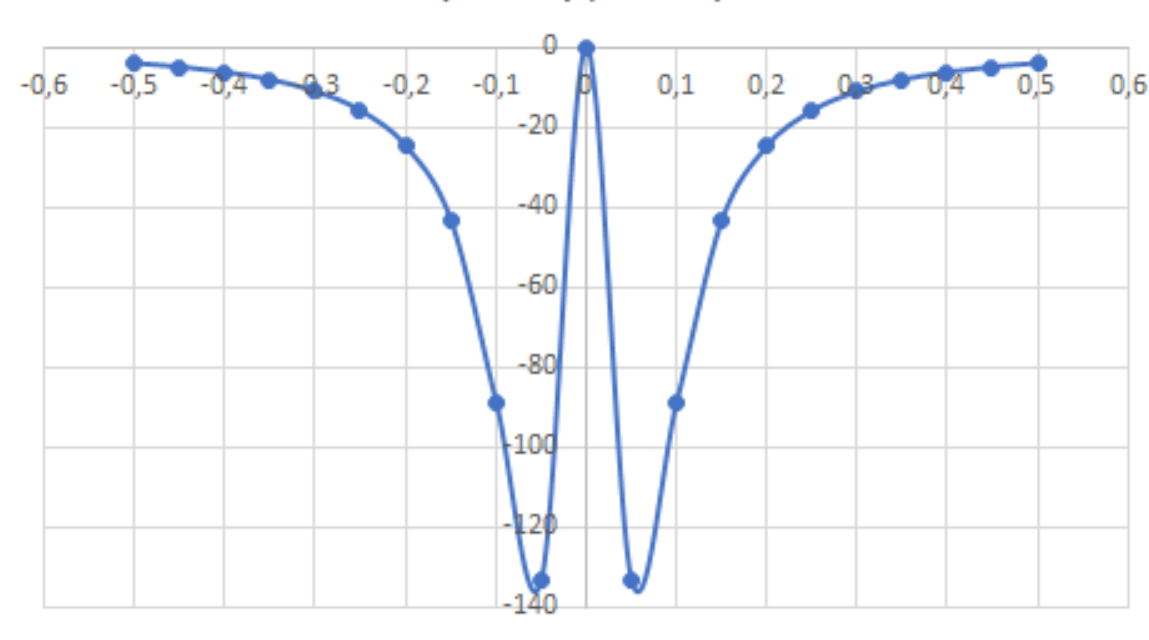


2. Так же, большинство торговых сетей имеют более или менее стандартные правила округления цены (никто не хочет видеть на ценниках цифры вроде 76рублей 12копеек).

3. Существуют ограничения на количество переоценок в единицу времени. Например, $N=100$ новых ценников в магазине. Тогда на (3.4) накладывается еще одно ограничение:
\begin{equation}
\tag{3.5}
\begin{cases}
P_{new}^{final} = i \cdot P_{old} + (1-i) \cdot P_{new} 
\\ i = 1, \quad если \quad |P_{new}-P_{old}|<\alpha 
\\ i = 0, \quad если \quad |P_{new}-P_{old}|\geq\alpha
\\ \sum i \leq N
\end{cases}
\end{equation}
Стоит отметить, что указанные ограничения чаще всего оставляют на совести постобработки, но в таком случае сложно говорить об эффективности процесса оптимизации. Постобработка требует тщательной проработки, чтобы и не нарушать бизнес-ограничения и следовать поставленной задаче.


### Оптимизационная задача


В общем виде оптимизационная задача формулируется так:

Максимизируй такой-то функционал F при соблюдении таких-то ограничений.

В качестве F может выступать такие показатели как валовая доходность, маржа, трафик, так и что-то более сложное. 

Например F= α∙G(Товарооборот)+(1-α)∙R(Трафик), где

α – некий балансирующий весовой коэффициент,

G и R – преобразования, переводящие товарооборот и трафик на одну шкалу, чтобы эта сумма вообще имела какой-то смысл.


Весь скоуп оптимизации может состоять из многих тысяч пар товар-магазин. 
Для некоторых диапазон поиска новой цены может быть явно или неявно вырожденным из-за противоречий правил друг другу. 
В таких случаях оптимизатор начнет ругаться, выдавать ошибку на всю задачу. 
При этом логические связи, чаще всего, затрагивают небольшие подгруппы изолированно. 
Решением может являться как составление эвристик, которые будут предварительно исключать рисковые пары из оптимизации, 
так и нарезка общей задачи на много маленьких так, чтобы все пары, для которых есть групповые правила, попадали в один батч оптимизации. 
Такой подход позволяет значительно ускорить расчет, а так же посчитать новые цены во всех группах, где это возможно не получая единый статус Failed или Infeasible на процесс. 

Из явных минусов придется уходить от сквозных правил, вроде (3.5) к каким-то более робастным